In [134]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
import sklearn.datasets

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas import DataFrame
from sklearn import neighbors

import graphviz
from sklearn.tree import export_graphviz # needed to visualize trained decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from IPython.display import display
plt.style.use("seaborn-v0_8")

In [159]:
#https://www.kaggle.com/datasets/uciml/student-alcohol-consumption/
df_mat = pd.read_csv('student-mat.csv') # math course
df_por = pd.read_csv('student-por.csv') # portuguease language course
df_both = pd.concat([df_mat, df_por])

In [145]:
df_both.info()

# FEATURES: grades (G1-G3), absences, age, parents edu (Medu, Fedu), parents status (Pstatus - T together, A - apart), study time, class
# failures, internet access (Y or N), goout (how often, 1-5), health (1-5)
# TARGET: Talc

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher      10

In [160]:
new_parent_status = pd.get_dummies(df_both["Pstatus"], dtype=int, drop_first=True)
df_both["Pstatus"] = new_parent_status

new_internet = pd.get_dummies(df_both["internet"], dtype=int, drop_first=True)
df_both["internet"] = new_internet

df_both["Talc"] = df_both["Dalc"] + df_both["Walc"]
df_both["grades"] = df_both["G1"] + df_both["G2"] + df_both["G3"]
df_both = df_both[["grades", "absences", "Pstatus", "studytime", "failures", "goout", "Talc"]]
df_both.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   grades     1044 non-null   int64
 1   absences   1044 non-null   int64
 2   Pstatus    1044 non-null   int32
 3   studytime  1044 non-null   int64
 4   failures   1044 non-null   int64
 5   goout      1044 non-null   int64
 6   Talc       1044 non-null   int64
dtypes: int32(1), int64(6)
memory usage: 61.2 KB


In [147]:
plt.scatter(df_both['age'], df_both['Talc'])
plt.title('Age vs. Total Alcohol Consumption')
plt.xlabel('Age')
plt.ylabel('Total Alcohol Consumption')
plt.show()


plt.hist(df_both['Talc'], bins=10)
plt.title('Total Alcohol Consumption Distribution')
plt.xlabel('Total Alcohol Consumption')
plt.ylabel('Number of Students')
plt.show()

plt.hist(df_both['age'], bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Students')
plt.show()


plt.plot(df_both['Fedu'], df_both['Talc'], 'b.', df_both['Medu'], df_both['Talc'], 'm.')
plt.title('Parent Education vs. Total Alcohol Consumption')
plt.xlabel('Parent Education')
plt.ylabel('Total Alcohol Consumption')
plt.show()

internet = df_both[df_both["internet"]>0]
no_internet = df_both[df_both["internet"]<1]
plt.hist([no_internet["Talc"], internet["Talc"]], bins=10, stacked=True, histtype="bar", label=["No Internet", "Internet"])
plt.title('Internet Access vs. Total Alcohol Consumption')
plt.xlabel('Total Alcohol Consumption')
plt.ylabel('Number of Students')
plt.legend()


KeyError: 'age'

In [163]:
y = df_both["Talc"]
# y = pd.Series([round(x/2.0) for x in y])

y=np.array(y)
for i in range(len(y)):
    if y[i]<=2:
        y[i]=1
    elif y[i]<=5:
        y[i]=2
    else:
        y[i]=3
X = df_both.drop(["Talc"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.1)

(array([391., 459., 170.]),
 array([1., 2., 3., 4.]),
 <BarContainer object of 3 artists>)

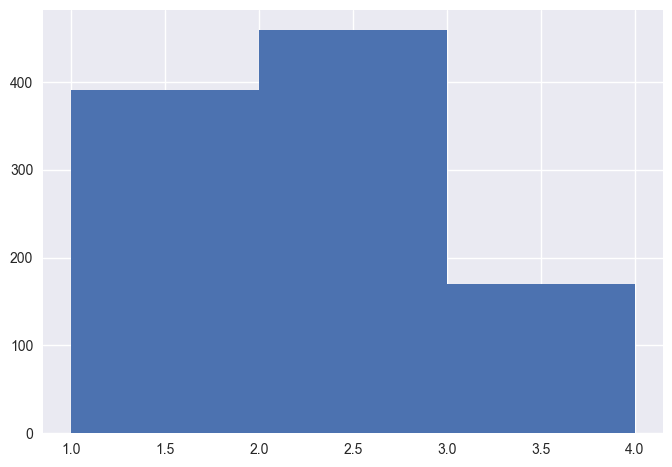

In [149]:
plt.hist(y, [1,2,3,4])

(0.638095238095238, 7, 60)


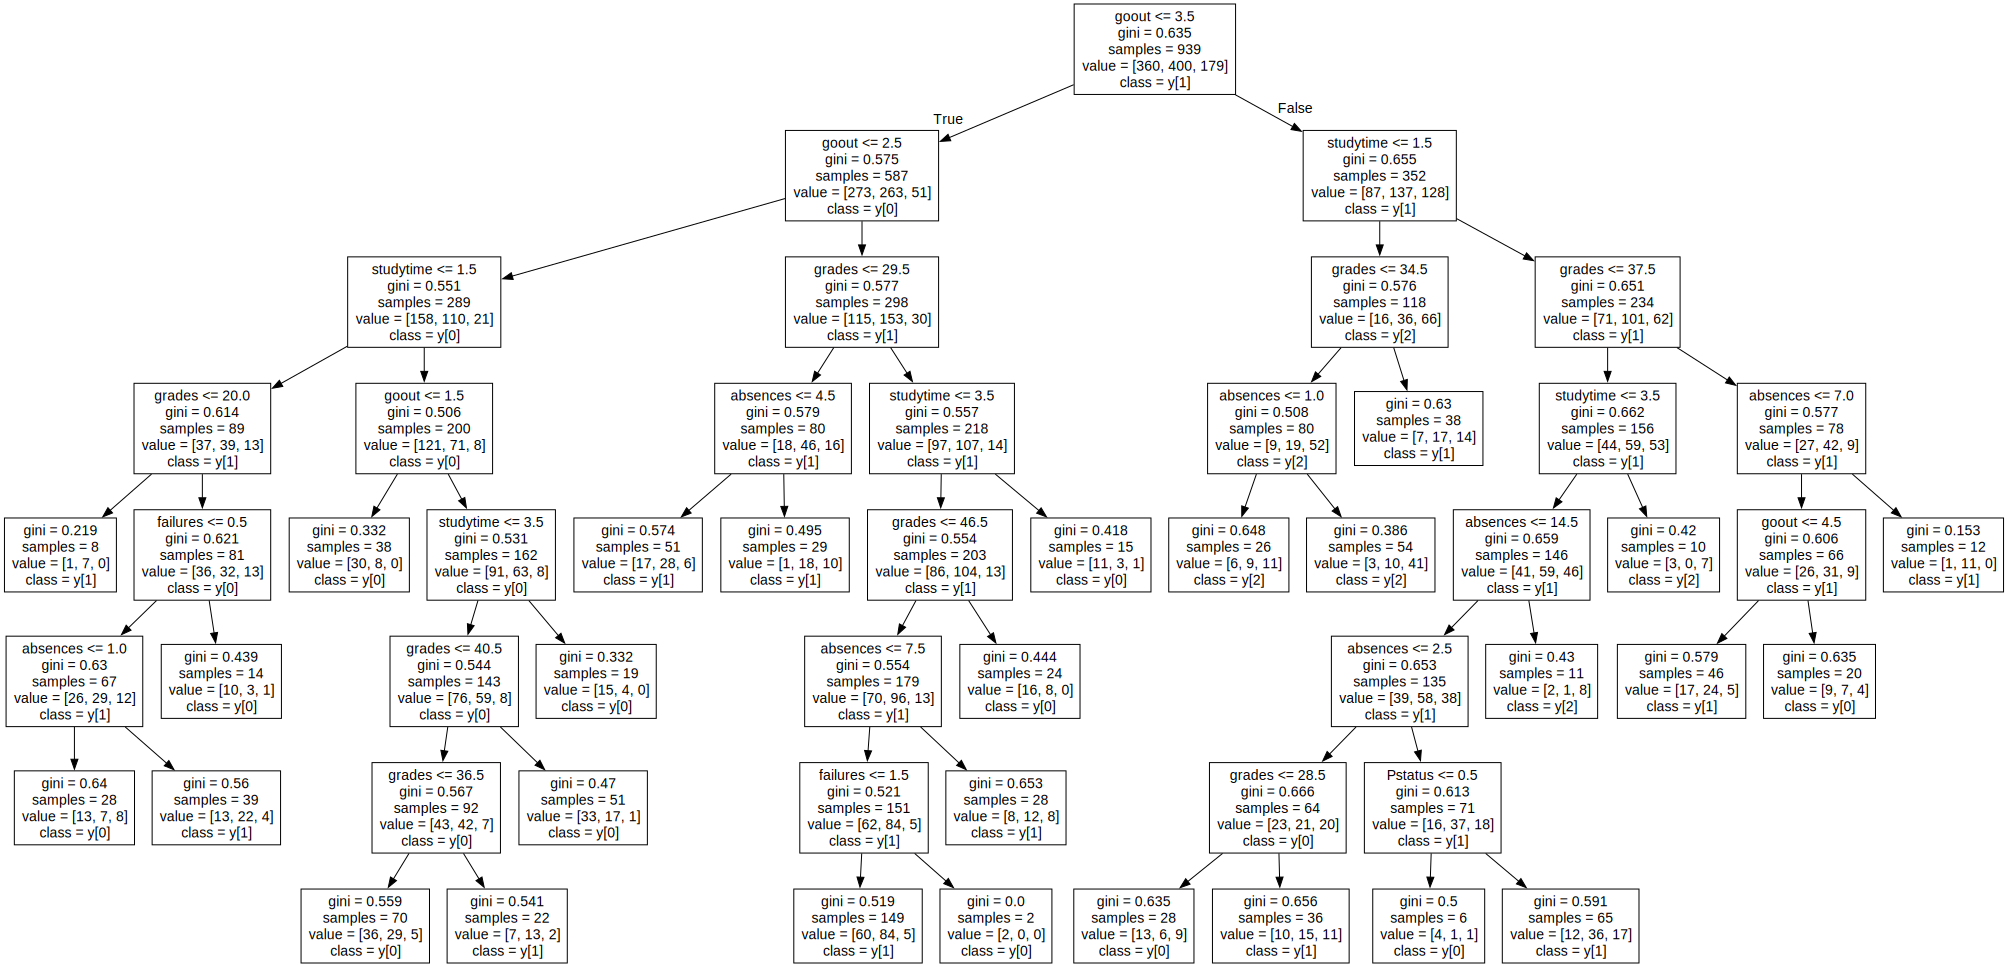

array([[20, 12,  4],
       [ 9, 42,  6],
       [ 2,  5,  5]], dtype=int64)

In [164]:
accuracy = []
for x in range(1,30):
    for y in range(50,300, 10):
        alctree = DecisionTreeClassifier(max_depth=x, min_samples_split=y)

        alctree.fit(X_train,y_train)

        accuracy.append((alctree.score(X_test, y_test),x,y))
max_acc = accuracy[0]
for x in accuracy:
    if max_acc[0] < x[0]:
        max_acc=x
print(max_acc)

alctree = DecisionTreeClassifier(max_depth=max_acc[1], min_samples_split=max_acc[2])
alctree.fit(X_train,y_train)
columns = list(X_train.columns)
display(graphviz.Source(export_graphviz(alctree, feature_names=columns, class_names=True, out_file=None)))
        
sk.metrics.confusion_matrix(alctree.predict(X_test), y_test)
